Nombre: López Fabián Jesús Manuel


Grupo: 5AV1

Carrera: Licenciatura en Ciencia de Datos

Fecha última modificación: 16/03/2024

# Práctica 1 y 2

## Análisis exploratorio, limpieza de datos, transformación de datos, e ingeniería de características.

In [1]:
# Importamos las librerias que utilizaremos a lo largo de la práctica.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Establece el estilo de la gráfica como 'bmh' (emula el estilo ggplot de R)
plt.style.use('bmh') 

In [3]:
# Lee un archivo CSV llamado "used_cars_data.csv" y carga los datos en un DataFrame llamado df
df = pd.read_csv("data/used_cars_data.csv")

In [4]:
def eliminar_nulos_unicamente_dimension(data: pd.DataFrame, variable: str):
    """
    Elimina las filas que contienen valores nulos únicamente en una dimensión específica.

    Parámetros:
        - data (pd.DataFrame): El DataFrame que contiene los datos a procesar.
        - variable (str): El nombre de la variable/dimensión donde se verificarán los valores nulos.

    Retorna:
        pd.DataFrame: El DataFrame con las filas que cumplen la condición eliminadas.
    """
    # Itera sobre cada fila del DataFrame data junto con su índice
    for index, row in data.iterrows():
        # Verifica si hay valores nulos en la fila actual
        nulos_fila = row.isna()
        
        # Obtiene el valor nulo específico para la dimensión dada
        asientos_nulo = nulos_fila[variable]
        
        # Verifica si hay valores nulos en todas las dimensiones excepto la variable dada
        otras_dimensiones_nulo = nulos_fila.drop(variable)
        otras_dimensiones_nulo = not otras_dimensiones_nulo.all()
        
        # Si hay valores nulos en la variable dada pero no en otras dimensiones, elimina la fila actual
        if asientos_nulo == True and otras_dimensiones_nulo == False:
            data.loc[index] = data.loc[index].dropna()
        
    # Devuelve el DataFrame modificado
    return data


In [5]:
cuenta = 9
for index, row in df.iterrows():
    nulos_fila = row.isna()
    asiento_nulo = nulos_fila['Seats']
    otras = nulos_fila.drop('Seats') # False False False
    otras = otras.any()

    if(asiento_nulo == True and otras == False):
        print('Encontrado :D')
        cuenta += 1
print(cuenta)

9


In [6]:
boole = [False, False, True]
boole = pd.Series(boole)
boole.any()

True

### Análisis exploratorio de datos (EDA, Exploratory Data Analysis)

#### Datos generales

a. Indicar todas las dimensiones del dataset, representadas por columnas.

In [7]:
# Imprime los nombres de las columnas en el DataFrame df
print(df.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


b. Desplegar los primeros 10 (top 10) registros del dataset.

In [8]:
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [9]:
for i in df["Seats"]:
    print(i)

5.0
5.0
5.0
7.0
5.0
5.0
5.0
8.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
6.0
5.0
5.0
5.0
5.0
7.0
5.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
8.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
8.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
7.0
5.0
4.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
8.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
2.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
5.0
4.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
7.0
5.0
7.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
8.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
7.0
nan
5.0
5.0
5.0
5.0
5.0
7.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
nan
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
nan
5.0
5.0
5.0
5.0
5.0
7.0
7.0
5.0
5.0
5.0
5.0
5.0
7.0
7.0
7.0
5.0
5.0
5.0
5.0
5.0


d. Indicar por cada dimensión si son numéricas o categóricas, lo que representan, y el tipo de dato utilizado para tal representación.

In [270]:
# Imprime los tipos de datos de cada columna en el DataFrame df
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### Análisis numérico

e. Por cada dimensión, obtener la cantidad de observaciones, la media, la
desviación estándar, y sus cuartiles (valor mínimo, 25%, 50%, 75% y valor
máximo)

In [271]:
# Genera un resumen estadístico de las columnas numéricas en el DataFrame df
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


f. Identificar por cada dimensión la cantidad y porcentaje de valores nulos.

In [272]:
#Cantidada de valores nulos por dimensión.


# Calcula la cantidad de valores nulos en cada columna del DataFrame df, ordena los resultados y los guarda en un nuevo DataFrame llamado nulos_columna
nulos_columna = pd.DataFrame(df.isna().sum().sort_values())

# Reinicia el índice del DataFrame nulos_columna para que el índice se convierta en una columna
nulos_columna.reset_index(inplace=True)

# Renombra las columnas del DataFrame nulos_columna para indicar claramente la dimensión y la cantidad de valores nulos
nulos_columna.columns = ['Nombre dimensión', 'Cantidad de valores nulos']

# Imprime el DataFrame nulos_columna
nulos_columna

,Nombre dimensión,Cantidad de valores nulos
0,S.No.,0
1,Name,0
2,Location,0
3,Year,0
4,Kilometers_Driven,0
5,Fuel_Type,0
6,Transmission,0
7,Owner_Type,0
8,Mileage,2
9,Engine,46


In [273]:
# Porcentaje de valores nulos por dimension


# Calcula el total de observaciones (filas) en el DataFrame df
total_observaciones = df.shape[0]

# Calcula el porcentaje de valores nulos en cada columna del DataFrame df, ordena los resultados y los guarda en un nuevo DataFrame llamado porcentaje_nulos
porcentaje_nulos = pd.DataFrame(round((df.isna().sum().sort_values() / total_observaciones) * 100, 2))

# Reinicia el índice del DataFrame porcentaje_nulos para que el índice se convierta en una columna
porcentaje_nulos.reset_index(inplace=True)

# Renombra las columnas del DataFrame porcentaje_nulos para indicar claramente la dimensión y el porcentaje de valores nulos
porcentaje_nulos.columns = ['Nombre dimensión', 'Porcentaje de valores nulos (%)']

# Imprime el DataFrame porcentaje_nulos
porcentaje_nulos

,Nombre dimensión,Porcentaje de valores nulos (%)
0,S.No.,0.00
1,Name,0.00
2,Location,0.00
3,Year,0.00
4,Kilometers_Driven,0.00
5,Fuel_Type,0.00
6,Transmission,0.00
7,Owner_Type,0.00
8,Mileage,0.03
9,Engine,0.63


In [274]:
# Obtiene los nombres de todas las variables (columnas) en el DataFrame df
variables = df.columns

# Inicializa un diccionario para almacenar el nombre de la dimensión y el número de duplicados para cada variable
duplicados = {}
duplicados["Dimension"] = []
duplicados["Num_duplicados"] = []

# Itera sobre cada variable en el DataFrame
for variable in variables:
    # Calcula la cantidad de duplicados para la variable actual
    cantidad_dup = df.duplicated(subset=variable).sum()
    
    # Agrega el nombre de la variable y la cantidad de duplicados al diccionario
    duplicados["Dimension"].append(variable)
    duplicados["Num_duplicados"].append(cantidad_dup)

# Crea un DataFrame a partir del diccionario de duplicados
df_duplicados = pd.DataFrame(duplicados)

# Ordena el DataFrame df_duplicados por la cantidad de duplicados de menor a mayor
df_duplicados.sort_values(by="Num_duplicados")

,Dimension,Num_duplicados
0,S.No.,0
4,Kilometers_Driven,3593
1,Name,5212
13,Price,5879
12,New_Price,6627
8,Mileage,6802
10,Power,6866
9,Engine,7102
3,Year,7230
2,Location,7242


#### Análisis gráfico
h. Grafique la distribución de cada una de las dimensiones numéricas.

In [275]:
def factorizar(numero):
    """
    Encuentra los factores de un número dado.

    Parámetros:
        - numero (int): El número que se va a factorizar.

    Retorna:
        tuple: Una tupla con los factores encontrados.
    """
    # Inicializar los factores más grandes
    factor1 = 1
    factor2 = numero

    # Buscar factores
    for i in range(2, int(numero**0.5) + 1):
        if numero % i == 0:
            # Si el número es divisible por i, actualiza los factores
            factor1 = i
            factor2 = numero // i

    return factor1, factor2

In [276]:
def graficar_dimensiones_numericas(data: pd.DataFrame, variables_numericas: list, color: str):
    """
    Grafica las dimensiones numéricas de un DataFrame.

    Parámetros:
        - data (pd.DataFrame): El DataFrame que contiene los datos a graficar.
        - variables_numericas (list): Lista de nombres de las variables numéricas a graficar.
        - color (str): Color a utilizar en los histogramas.

    Retorna:
        None
    """
    # Calcula el número total de filas y columnas en la figura factorizando el numero de variables numericas en sus dos factores mas grandes
    total_rows , total_columns = factorizar(len(variables_numericas))

    # Inicializa contadores para la posición de los subgráficos
    i = j = 0

    # Crea una figura y un arreglo de ejes para los subgráficos
    fig, ax = plt.subplots(total_rows, total_columns, figsize=(15, 10))

    # Itera sobre cada variable numérica
    for variable in variables_numericas:
        # Dibuja un histograma para la variable actual en el subgráfico correspondiente
        ax[i, j].hist(data[variable], bins=150, color=color)
        
        # Establece el título del subgráfico
        ax[i, j].set_title(variable + ' distribución')
        
        # Etiqueta los ejes x e y del subgráfico
        ax[i, j].set_xlabel(variable)
        ax[i, j].set_ylabel('Frecuencia')

        # Actualiza las variables de fila y columna para pasar al siguiente subgráfico
        i += 1
        if i >= total_rows:
            i = 0
            j += 1

    # Ajusta los espacios entre los subgráficos
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # Muestra la figura con los subgráficos generados
    plt.show()

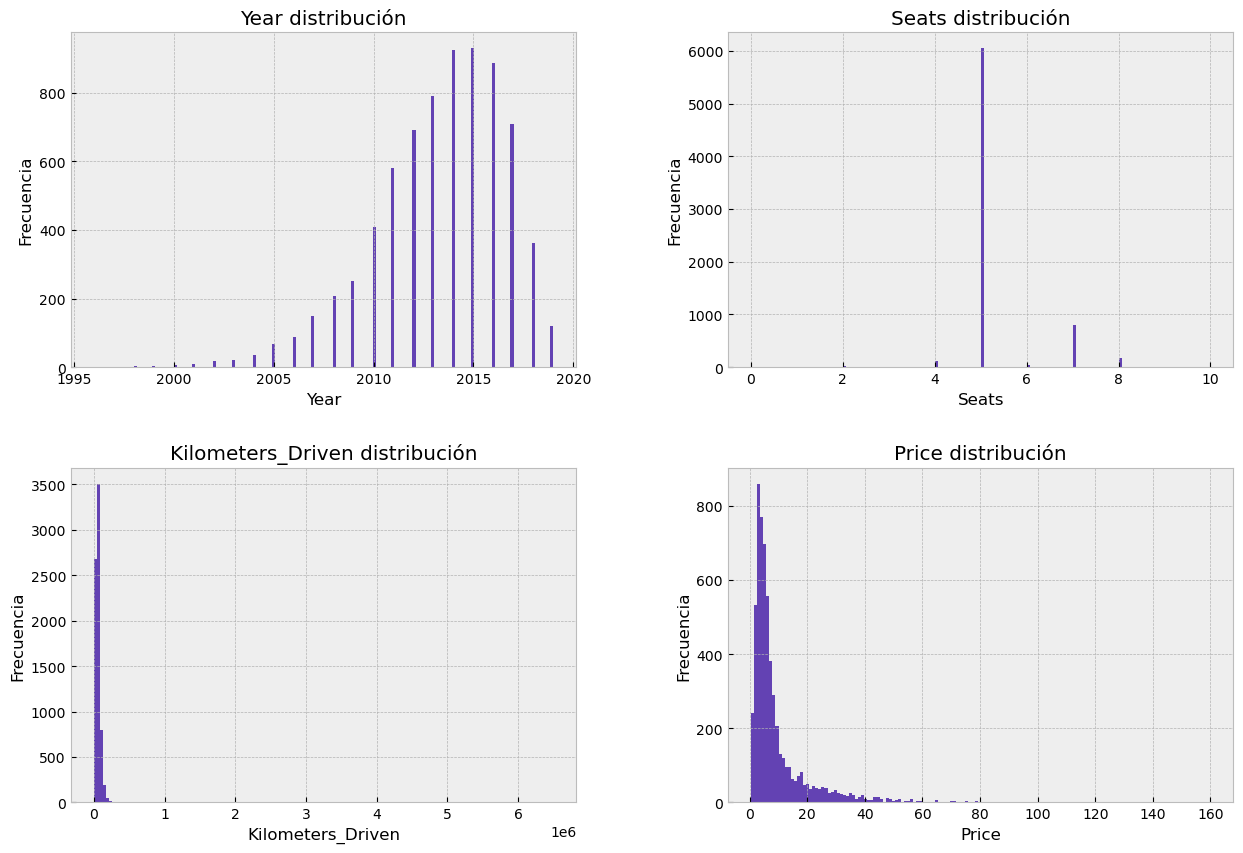

In [277]:
# Lista de variables numéricas de interés
variables_num = ["Year", "Kilometers_Driven", "Seats", "Price"]

graficar_dimensiones_numericas(df,variables_num,'#6342B3')

i.  Compare entre sí cada una de las dimensiones numéricas (análisis bivariado)
con un gráfico del tipo “pairplot”

/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

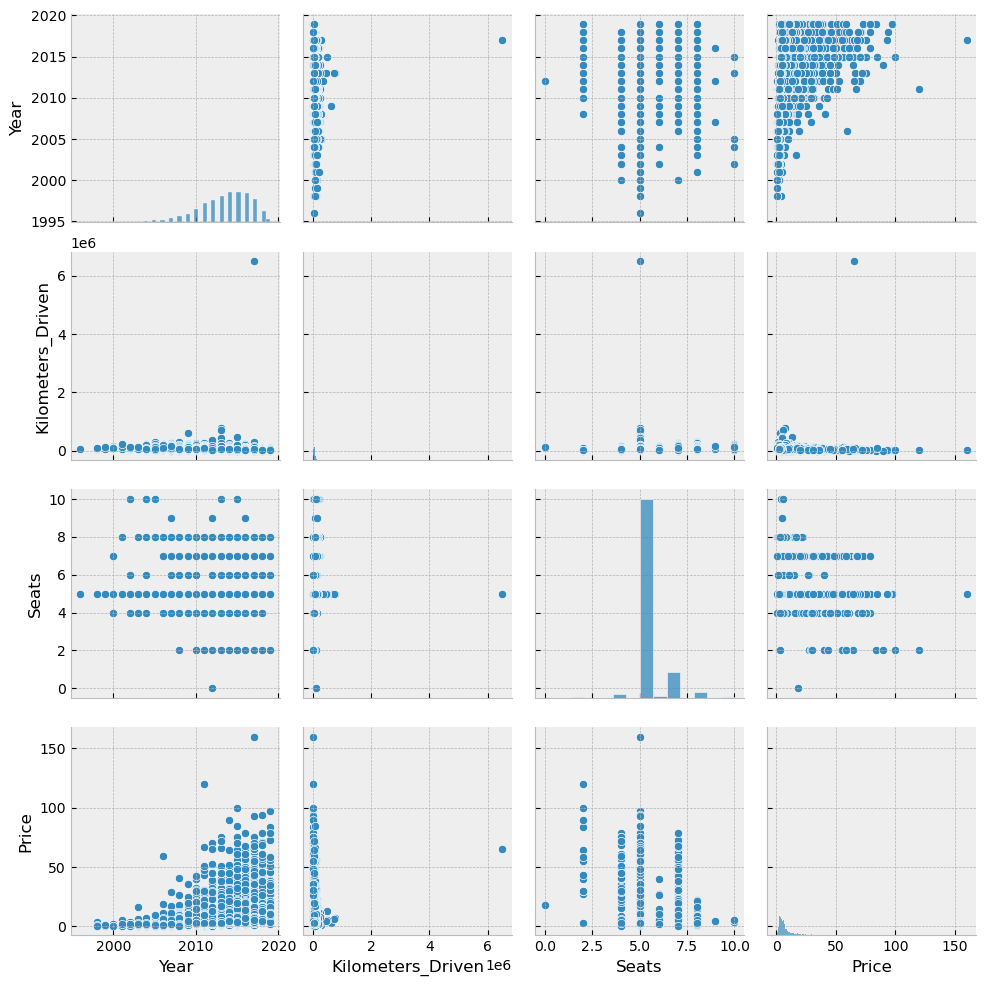

In [278]:
sns.pairplot(data=df[variables_num])
plt.show()

j. Realice un mapa de calor para identificar la correlación entre todas las variables (análisis multivariado).

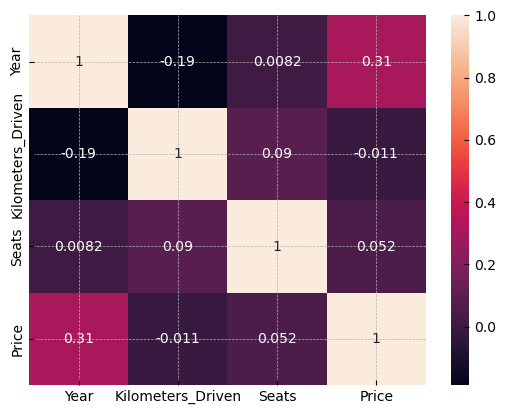

In [279]:
# Calcula la matriz de correlación entre las variables numéricas seleccionadas
matriz_cor = df[variables_num].corr()

# Dibuja un mapa de calor de la matriz de correlación, con anotaciones mostradas en cada celda
sns.heatmap(matriz_cor, annot=True)

# Muestra el gráfico
plt.show()

k. Grafique la distribución de cada una de las dimensiones categóricas

In [280]:
def graficar_dimensiones_categoricas(data: pd.DataFrame, variables_categoricas: list, color: str):
    """
    Grafica las dimensiones categóricas de un DataFrame.

    Parámetros:
        - data (pd.DataFrame): El DataFrame que contiene los datos a graficar.
        - variables_categoricas (list): Lista de nombres de las variables categóricas a graficar.
        - color (str): Color a utilizar en las barras del gráfico de barras.

    Retorna:
        None
    """
    # Calcula el número total de filas y columnas en la figura factorizando el numero de variables categoricas en sus dos factores mas grandes.
    total_rows , total_columns = factorizar(len(variables_categoricas))
    
    # Crea una figura y un arreglo de ejes para los subgráficos
    fig, ax = plt.subplots(total_rows, total_columns, figsize=(15, 10))    

    # Inicializa contadores para la posición de los subgráficos
    i = j = 0

    # Itera sobre cada variable categórica
    for variable in variables_categoricas:
        # Dibuja un gráfico de barras para la variable actual en el subgráfico correspondiente
        data[variable].value_counts().plot(kind='bar', ax=ax[i,j], color=color)
        
        # Establece el título del subgráfico
        ax[i,j].set_title(variable)
        
        # Etiqueta los ejes x e y del subgráfico
        ax[i,j].set_xlabel(variable)
        ax[i,j].set_ylabel("Frecuencia")

        # Actualiza las variables de fila y columna para pasar al siguiente subgráfico
        i += 1
        if i >= total_rows:
            i = 0
            j += 1
            
    # Ajusta los espacios entre los subgráficos
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Muestra la figura con los subgráficos generados
    plt.show()


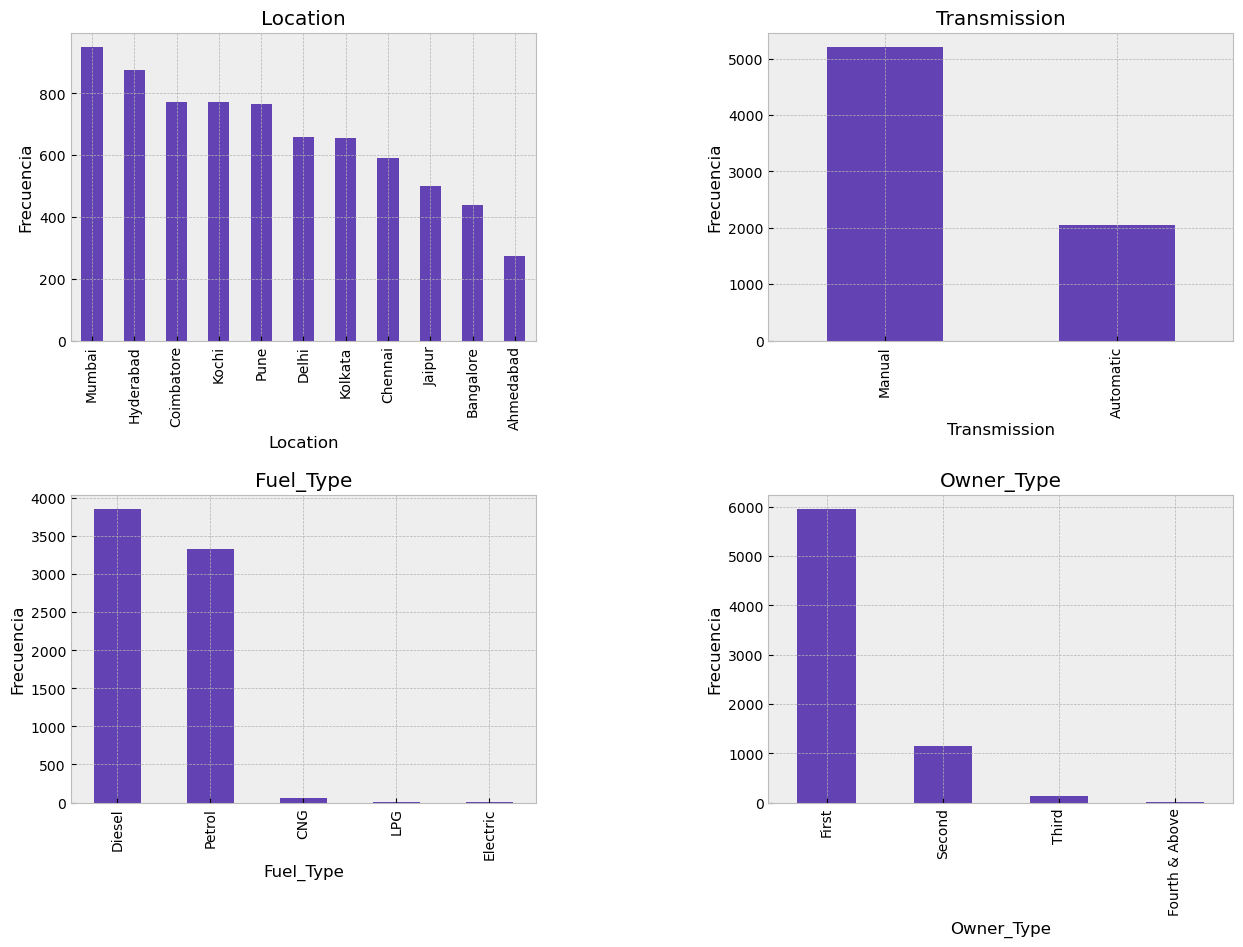

In [281]:
variables_cat = [ "Location", "Fuel_Type", "Transmission","Owner_Type"]
graficar_dimensiones_categoricas(df,variables_cat, '#6342B3')

l. Compare cada una de las dimensiones categóricas (eje X) contra la dimensión “Precio” (eje y). Para ello debe primero agrupar por categoría, después obtener su media, y finalmente ordenar los valores de mayor a menor. Un ejemplo de la salida esperada para la dimensión “Combustible” se muestra a continuación:

In [282]:
def graficar_variable_vs_precio(data: pd.DataFrame, variables_categoricas: list, color: str):
    """
    Grafica la relación entre variables categóricas y el precio medio en un DataFrame.

    Parámetros:
        - data (pd.DataFrame): El DataFrame que contiene los datos a graficar.
        - variables_categoricas (list): Lista de nombres de las variables categóricas.
        - color (str): Color a utilizar en las barras del gráfico de barras.

    Retorna:
        None
    """
    # Calcula el número total de filas y columnas en la figura factorizando el numero de variables categoricas en sus dos factores mas grandes.
    total_rows , total_columns = factorizar(len(variables_categoricas))
    
    # Crea una figura y un arreglo de ejes para los subgráficos
    fig, ax = plt.subplots(total_rows, total_columns, figsize=(15, 10))    

    # Inicializa contadores para la posición de los subgráficos
    i = j = 0

    # Itera sobre cada variable categórica
    for variable in variables_categoricas:
        # Agrupa el DataFrame por la variable categórica, calcula el precio medio y lo agrupa por la media del precio de forma descendiente.
        group = data.groupby(variable)[['Price']].agg('mean').sort_values(by='Price', ascending=False)
        
        # Dibuja un gráfico de barras para la variable actual en el subgráfico correspondiente
        ax[i,j].bar(x=group.index, height=group['Price'], color=color)
        
        # Establece el título del subgráfico
        ax[i,j].set_title(variable)
        
        # Etiqueta el eje y del subgráfico
        ax[i,j].set_ylabel("Price")
        
        # Establece las etiquetas y la rotación del eje x del subgráfico
        ax[i,j].set_xticks(group.index)
        ax[i,j].set_xticklabels(group.index, rotation=45, ha='right')

        # Actualiza las variables de fila y columna para pasar al siguiente subgráfico
        i += 1
        if i >= 2:
            i = 0
            j += 1
            
    # Ajusta los espacios entre los subgráficos
    plt.subplots_adjust(hspace=0.35, wspace=0.5)
    
    # Muestra la figura con los subgráficos generados
    plt.show()

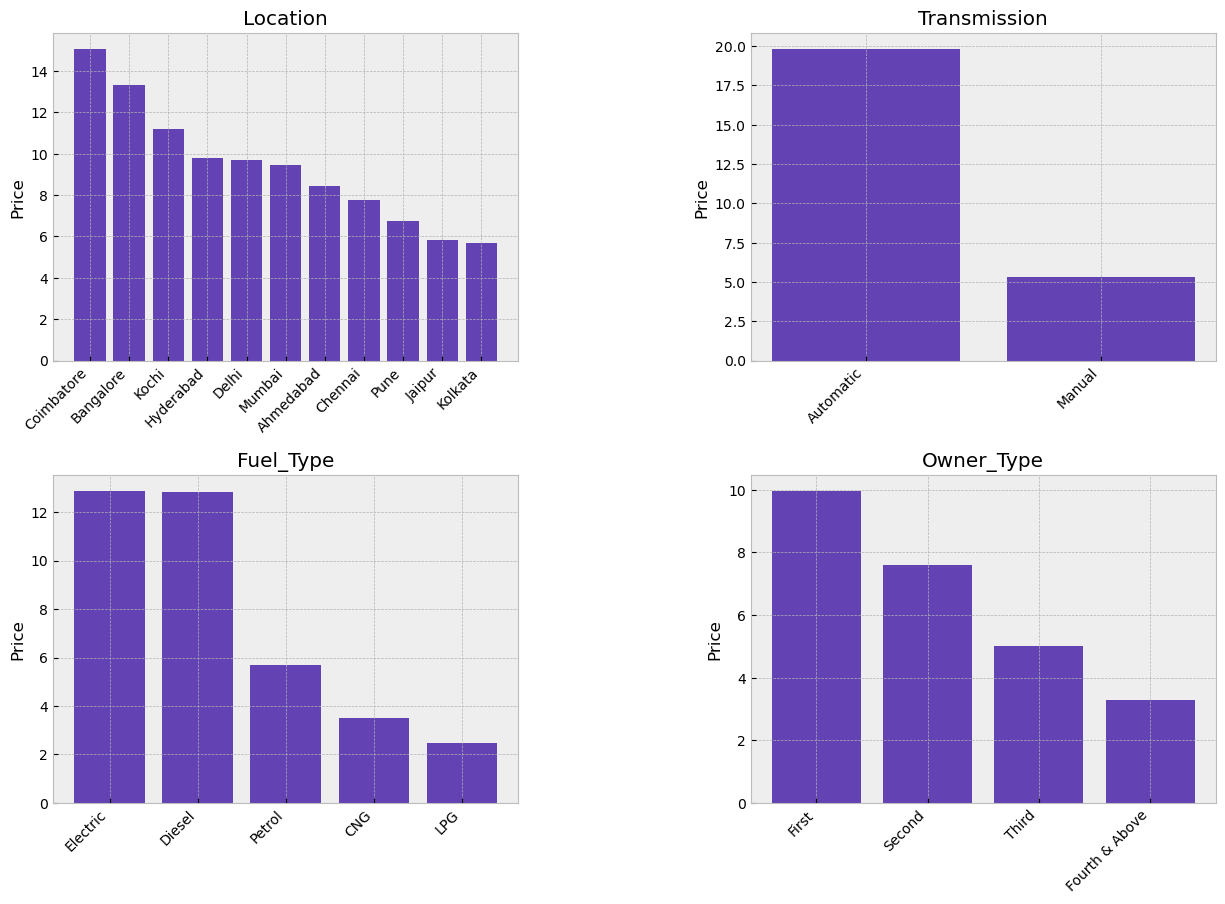

In [283]:
graficar_variable_vs_precio(df,variables_cat,'#6342B3')

### 2. Limpieza de datos

a. Elimine las dimensiones "S. No." y "New Price"

In [284]:
#Primeros 5 registros antes de eliminar las dimensiones: 
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [285]:
#Creamos un nuevo conjunto de datos sin las dimensiones 'S.No.' y 'New_Price'
new_df = df.drop(['S.No.','New_Price'], axis=1)

In [286]:
#Primeros 5 registros después de eliminar las dimensiones
new_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [287]:
#Tamaño del nuevo conjuto de datos
new_df.shape

(7253, 12)

b. Sustituya el nombre en inglés de cada dimensión por su traducción en español.

In [288]:
#Mostramos los nombres antes de la traducción
new_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [289]:
# Creamos una lista con los nombres traducidos.
nombres_traducidos = ['Nombre', 'Ubicacion', 'Anio', 'Kilometros_Recorridos', 'Tipo_Combustible', 'Transmision', 'Tipo_Propietario', 'Millaje', 'Motor', 'Potencia','Asientos','Precio']

#Sustituimos los nombres anteriores por los traducidos.
new_df.columns = nombres_traducidos

In [290]:
# Mostramos los primeros 5 registros del dataset con los nombres en español.
new_df.head()

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


c. Elimine todas las observaciones que **únicamente** tengan valores nulos en la dimensión “Asientos”. Es decir, hay observaciones con valores nulos en dicha dimensión, en la dimensión “Potencia” y en otras más. Estos casos no deben ser eliminados

In [291]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_antes_eliminar_asientos = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_antes_eliminar_asientos = nulos_antes_eliminar_asientos.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_antes_eliminar_asientos.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos antes de eliminar las filas con valores nulos en 'Asientos'
nulos_antes_eliminar_asientos


,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,2
8,Motor,46
9,Potencia,46


In [292]:
def eliminar_nulos_unicamente_dimension(data: pd.DataFrame, variable: str):
    """
    Elimina las filas que contienen valores nulos únicamente en una dimensión específica.

    Parámetros:
        - data (pd.DataFrame): El DataFrame que contiene los datos a procesar.
        - variable (str): El nombre de la variable/dimensión donde se verificarán los valores nulos.

    Retorna:
        pd.DataFrame: El DataFrame con las filas que cumplen la condición eliminadas.
    """
    # Itera sobre cada fila del DataFrame data junto con su índice
    for index, row in data.iterrows():
        # Verifica si hay valores nulos en la fila actual
        nulos_fila = row.isna()
        
        # Obtiene el valor nulo específico para la dimensión dada
        asientos_nulo = nulos_fila[variable]
        
        # Verifica si hay valores nulos en todas las dimensiones excepto la variable dada
        otras_dimensiones_nulo = nulos_fila.drop(variable)
        otras_dimensiones_nulo = otras_dimensiones_nulo.any()
        
        # Si hay valores nulos en la variable dada pero no en otras dimensiones, elimina la fila actual
        if asientos_nulo == True and otras_dimensiones_nulo == False:
            data.loc[index] = data.loc[index].dropna()
        
    # Devuelve el DataFrame modificado
    return data


In [293]:
new_df = eliminar_nulos_unicamente_dimension(new_df,'Asientos')

In [294]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_despues_eliminar_asientos = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_despues_eliminar_asientos = nulos_despues_eliminar_asientos.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_despues_eliminar_asientos.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos después de eliminar las filas con valores nulos en 'Asientos'
nulos_despues_eliminar_asientos


,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,2
8,Motor,46
9,Potencia,46


d. Sustituya todos los valores nulos en la dimensión “Millaje” por la media de la dimensión.

In [295]:
def is_km_kg(cadena) -> bool:
    """
    Función que verifica si una cadena contiene la unidad 'km/kg'.

    Args:
        cadena: Cadena de caracteres a verificar.

    Returns:
        bool: True si la cadena contiene 'km/kg', False de lo contrario.
    """
    # Verifica si la cadena es una instancia de str y si contiene 'km/kg'
    
    if isinstance(cadena, str) and cadena.__contains__('km/kg'):
        return True
    else:
        return False


Solo contamos con dos tipos de combustible:


In [296]:
# Filtra el DataFrame new_df para seleccionar las filas donde la columna 'Millaje'
# cumple con la función is_km_kg, que verifica si la cadena de la columna contiene
# la unidad 'km/kg'. Se utiliza el método apply junto con la función is_km_kg para
# aplicar esta verificación a cada valor de la columna 'Millaje'.

is_km_kg_data = new_df[new_df['Millaje'].apply(is_km_kg)]
is_km_kg_data

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...
6538,Maruti Alto K10 LXI CNG,Kochi,2015,47490,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
6918,Hyundai Accent Executive LPG,Jaipur,2010,40000,LPG,Manual,Second,13.2 km/kg,1495 CC,93.7 bhp,5.0,NaN
6926,Maruti Eeco 5 STR With AC Plus HTR CNG,Mumbai,2017,15500,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN


In [297]:
is_km_kg_data['Tipo_Combustible'].unique()

array(['CNG', 'LPG'], dtype=object)

Solo tenemos dos tipos de combustible para unidades con km/kg

In [298]:
def convert_kmkg_to_kmpl(data: pd.DataFrame):
    """
    Función para convertir los valores de 'Millaje' de km/kg a kmpl
    utilizando densidades específicas de combustible.

    Args:
        data (DataFrame): DataFrame que contiene la columna 'Millaje' a convertir.

    Returns:
        None: El DataFrame se modifica directamente.
    """
    # Densidades específicas de combustible para la conversión
    density_CNG_kmpl = 0.13
    density_LPG_kmpl = 0.58

    # Iterar sobre cada fila del DataFrame
    for index, row in data.iterrows():
        # Verificar si el valor de 'Millaje' es una cadena
        if isinstance(data.loc[index, 'Millaje'], str):
            # Obtener el número y la unidad del valor de 'Millaje'
            num = float(row['Millaje'][:4])
            unidad = row['Millaje'][5:]

            # Verificar si la unidad es 'km/kg'
            if unidad == 'km/kg':
                # Calcular el nuevo valor de 'Millaje' en kmpl
                if row['Tipo_Combustible'] == 'CNG':
                    new_df.loc[index, 'Millaje'] = num / density_CNG_kmpl
                else:
                    new_df.loc[index, 'Millaje'] = num / density_LPG_kmpl
            else:
                # Si la unidad no es 'km/kg', mantener el valor original
                new_df.loc[index, 'Millaje'] = num


In [299]:
convert_kmkg_to_kmpl(new_df)

In [300]:
new_df.head()

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,204.615385,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74


In [301]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_antes_imputar_media = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_antes_imputar_media = nulos_antes_imputar_media.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_antes_imputar_media.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos después de eliminar las filas con valores nulos en 'Asientos'
nulos_antes_imputar_media

,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,2
8,Motor,46
9,Potencia,46


In [302]:
# Imputar media en valores nulos
new_df['Millaje'].fillna(new_df['Millaje'].mean(),inplace=True)

In [303]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_despues_imputar_media = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_despues_imputar_media = nulos_despues_imputar_media.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_despues_imputar_media.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos después de imputar la media en 'Millaje'.
nulos_despues_imputar_media

,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,0
8,Motor,46
9,Potencia,46


e. Sustituya todos los valores nulos en la dimensión “Motor” por la moda de la dimensión.

In [304]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_antes_imputar_moda = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_antes_imputar_moda = nulos_antes_imputar_moda.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_antes_imputar_moda.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos después de eliminar las filas con valores nulos en 'Asientos'
nulos_antes_imputar_moda


,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,0
8,Motor,46
9,Potencia,46


In [305]:
# Imputamos la moda de la dimensión.
new_df['Motor'].fillna(new_df['Motor'].mode()[0], inplace=True)

In [306]:
# Calcula la cantidad de valores nulos en cada dimensión del DataFrame new_df y los ordena
nulos_despues_imputar_moda = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame resultante para que los índices se conviertan en columnas
nulos_despues_imputar_moda = nulos_despues_imputar_moda.reset_index()

# Renombra las columnas del DataFrame resultante
nulos_despues_imputar_moda.columns = ['Dimension', 'Cantidad nulos']

# Muestra el DataFrame con la cantidad de valores nulos después de eliminar las filas con valores nulos en 'Asientos'
nulos_despues_imputar_moda

,Dimension,Cantidad nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,0
8,Motor,0
9,Potencia,46


### 3. Transformación de datos.

a. Sustituya los registros que contengan las siguientes palabras en la dimensión “Nombre” por la respectiva cadena sustituto: "ISUZU" por "Isuzu", "Mini" por "MiniCooper", y "Land" por "LandRover".

In [307]:
# Verificar los casos en los que esta presente la palaba 'Mini'
for index, row in new_df.iterrows():
    if row['Nombre'].__contains__('Mini'):
        print(row['Nombre'])

Mini Countryman Cooper D
Mini Cooper Convertible S
Mini Clubman Cooper S
Mini Cooper Convertible 1.6
Mini Cooper Convertible S
Mini Cooper 5 DOOR D
Mini Cooper S
Mini Cooper 5 DOOR D
Mini Cooper 5 DOOR D
Mini Cooper Countryman D
Mini Cooper 3 DOOR D
Mini Cooper Countryman D High
Mini Cooper 5 DOOR D
Mini Cooper Countryman D High
Mini Cooper Convertible S
Mini Cooper 3 DOOR S
Mini Cooper Convertible S
Mini Cooper Convertible S
Mini Cooper S Carbon Edition
Mini Cooper 5 DOOR D
Mini Cooper 3 DOOR D
Mini Cooper 3 DOOR D
Mini Cooper Countryman D
Mini Cooper S Carbon Edition
Mini Cooper S Carbon Edition
Mini Cooper 3 DOOR S
Mini Cooper S
Mini Cooper 3 DOOR D
Mini Cooper 3 DOOR D
Mini Clubman Cooper S
Mini Cooper Countryman D


In [308]:
# Itera sobre cada fila del DataFrame new_df junto con su índice
for index, row in new_df.iterrows():
    # Verifica si el valor en la columna 'Nombre' contiene 'Mini Cooper'
    if row['Nombre'].__contains__('Mini Cooper'):
        # Reemplaza 'Mini Cooper' por 'MiniCooper' en la columna 'Nombre'
        new_df.loc[index, 'Nombre'] = row['Nombre'].replace('Mini Cooper', 'MiniCooper')
    # Verifica si el valor en la columna 'Nombre' contiene 'Mini' (pero no 'Mini Cooper')
    elif row['Nombre'].__contains__('Mini'):
        # Reemplaza 'Mini' por 'MiniCooper' en la columna 'Nombre'
        new_df.loc[index, 'Nombre'] = row['Nombre'].replace('Mini', 'MiniCooper')


In [309]:
# Visualizamos nuevamente los casos en los que tenemos presente la palabra 'Mini' en la dimensión 'Nombre'.
for index, row in new_df.iterrows():
    if row['Nombre'].__contains__('Mini'):
        print(row['Nombre'])

MiniCooper Countryman Cooper D
MiniCooper Convertible S
MiniCooper Clubman Cooper S
MiniCooper Convertible 1.6
MiniCooper Convertible S
MiniCooper 5 DOOR D
MiniCooper S
MiniCooper 5 DOOR D
MiniCooper 5 DOOR D
MiniCooper Countryman D
MiniCooper 3 DOOR D
MiniCooper Countryman D High
MiniCooper 5 DOOR D
MiniCooper Countryman D High
MiniCooper Convertible S
MiniCooper 3 DOOR S
MiniCooper Convertible S
MiniCooper Convertible S
MiniCooper S Carbon Edition
MiniCooper 5 DOOR D
MiniCooper 3 DOOR D
MiniCooper 3 DOOR D
MiniCooper Countryman D
MiniCooper S Carbon Edition
MiniCooper S Carbon Edition
MiniCooper 3 DOOR S
MiniCooper S
MiniCooper 3 DOOR D
MiniCooper 3 DOOR D
MiniCooper Clubman Cooper S
MiniCooper Countryman D


In [310]:
# Verificar los casos en los que esta presente la palaba 'ISUZU'
for index, row in new_df.iterrows():
    if row['Nombre'].__contains__('ISUZU'):
        print(row['Nombre'])

ISUZU D-MAX V-Cross 4X4
ISUZU D-MAX V-Cross 4X4
ISUZU D-MAX V-Cross 4X4


In [311]:
# Itera sobre cada fila del DataFrame new_df junto con su índice
for index, row in new_df.iterrows():
    # Verifica si el valor en la columna 'Nombre' contiene 'ISUZU'
    if row['Nombre'].__contains__('ISUZU'):
        # Reemplaza 'ISUZU' por 'Isuzu' en la columna 'Nombre'
        new_df.loc[index, 'Nombre'] = row['Nombre'].replace('ISUZU', 'Isuzu')


In [312]:
for index, row in new_df.iterrows():
    if row['Nombre'].__contains__('Isuzu'):
        print(row['Nombre'])

Isuzu MUX 4WD
Isuzu D-MAX V-Cross 4X4
Isuzu D-MAX V-Cross 4X4
Isuzu MU 7 4x2 HIPACK
Isuzu D-MAX V-Cross 4X4


In [313]:
# Verificar los casos en los que esta presente la palaba 'Land'
for index, row in new_df.iterrows():
    if row['Nombre'].__contains__('Land'):
        print(row['Nombre'])

Land Rover Range Rover 2.2L Pure
Land Rover Freelander 2 TD4 SE
Land Rover Range Rover 2.2L Dynamic
Land Rover Range Rover HSE Dynamic
Land Rover Range Rover 2.2L Dynamic
Land Rover Range Rover 2.2L Prestige
Land Rover Range Rover 2.2L Pure
Land Rover Range Rover Evoque 2.0 TD4 Pure
Land Rover Range Rover HSE Dynamic
Land Rover Freelander 2 SE
Land Rover Range Rover 3.0 D
Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic
Land Rover Range Rover TDV8 (Diesel)
Land Rover Freelander 2 HSE
Land Rover Freelander 2 TD4 S
Land Rover Discovery 4 TDV6 SE
Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel
Land Rover Range Rover Sport 2005 2012 Sport
Land Rover Range Rover Sport SE
Land Rover Range Rover 2.2L Pure
Land Rover Discovery Sport TD4 HSE 7S
Land Rover Freelander 2 SE
Land Rover Range Rover Evoque 2.0 TD4 Pure
Land Rover Discovery HSE Luxury 3.0 TD6
Land Rover Range Rover 2.2L Prestige
Land Rover Range Rover Sport 2005 2012 HSE
Land Rover Discovery SE 3.0 TD6
Land Rover Range Rover HSE Dyna

In [314]:
# Itera sobre cada fila del DataFrame new_df junto con su índice
for index, row in new_df.iterrows():
    # Verifica si el valor en la columna 'Nombre' contiene 'Land Rover'
    if row['Nombre'].__contains__('Land Rover'):
        # Reemplaza 'Land Rover' por 'LandRover' en la columna 'Nombre'
        new_df.loc[index, 'Nombre'] = row['Nombre'].replace('Land Rover', 'LandRover')


In [315]:
def nombres_corregidos(nombre: str):
    """
    Verifica si un nombre dado coincide con alguno de los nombres corregidos.

    Parámetros:
        - nombre (str): El nombre a verificar.

    Retorna:
        bool: True si el nombre coincide con alguno de los nombres corregidos, False de lo contrario.
    """
    # Lista de nombres corregidos
    nombres = ['LandRover', 'MiniCooper', 'Isuzu']
    
    # Verifica si el nombre dado coincide con alguno de los nombres corregidos
    if any(nombre_contenido in nombre for nombre_contenido in nombres):
        return True
    else:
        return False

In [316]:
# Mostrar algunos registros con los nombres corregidos
new_df[new_df['Nombre'].apply(nombres_corregidos)]

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
13,LandRover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7,2179 CC,187.7 bhp,5.0,27.00
14,LandRover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,17.50
176,MiniCooper Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6,1998 CC,112 bhp,5.0,23.00
191,LandRover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7,2179 CC,187.7 bhp,5.0,55.76
228,MiniCooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.8,1998 CC,189.08 bhp,4.0,35.67
...,...,...,...,...,...,...,...,...,...,...,...,...
6919,Isuzu D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4,2499 CC,134 bhp,5.0,NaN
7132,MiniCooper Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8,1998 CC,192 bhp,5.0,NaN
7157,LandRover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7,2179 CC,187.7 bhp,5.0,NaN
7160,MiniCooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8,1998 CC,112 bhp,5.0,NaN


b. Elimine los caracteres de las dimensiones “Millas por Galón”, “Motor”, y “Potencia”.

In [317]:
# Itera sobre cada fila del DataFrame new_df junto con su índice
for index, row in new_df.iterrows():
    # Verifica si el valor en la columna 'Motor' es una cadena (str) y si contiene 'CC'
    if isinstance(new_df.loc[index,'Motor'], str) and new_df.loc[index,'Motor'].__contains__('CC'):
        # Si cumple ambas condiciones, elimina los últimos tres caracteres de la cadena en la columna 'Motor'
        new_df.loc[index,'Motor'] = new_df.loc[index,'Motor'][:-3]

new_df['Motor'] = pd.to_numeric(new_df['Motor'], errors='coerce')

In [318]:
# Itera sobre cada fila del DataFrame new_df junto con su índice
for index, row in new_df.iterrows():
    # Verifica si el valor en la columna 'Potencia' es una cadena (str) y si contiene 'bhp'
    if isinstance(new_df.loc[index,'Potencia'], str) and new_df.loc[index,'Potencia'].__contains__('bhp'):
        # Si cumple ambas condiciones, elimina los últimos tres caracteres de la cadena en la columna 'Potencia'
        new_df.loc[index,'Potencia'] = new_df.loc[index,'Potencia'][:-3]
    
new_df['Potencia'] = pd.to_numeric(new_df['Potencia'], errors='coerce')

In [319]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,204.615385,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.600000,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.700000,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,36.379310,814,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.000000,1461,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.300000,2755,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.500000,1598,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.300000,1248,74.00,5.0,1.95


c. Redonde al número entero más cercano los valores de las dimensiones “Millas por Galón”, “Motor” y “Potencia”.

In [320]:
new_df[['Millaje', 'Motor', 'Potencia']] = new_df[['Millaje', 'Motor', 'Potencia']].round()

In [321]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,205.0,998,58.0,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,20.0,1582,126.0,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,89.0,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,21.0,1248,89.0,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968,141.0,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,36.0,814,55.0,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.0,1461,63.0,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.0,2755,172.0,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.0,1598,104.0,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.0,1248,74.0,5.0,1.95


d. Multiplique por mil los valores en la dimensión “Precio”.

In [322]:
new_df['Precio'] = new_df['Precio'] * 1000

In [323]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,205.0,998,58.0,5.0,1750.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,20.0,1582,126.0,5.0,12500.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,89.0,5.0,4500.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,21.0,1248,89.0,7.0,6000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.0,1968,141.0,5.0,17740.0
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,36.0,814,55.0,5.0,2350.0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.0,1461,63.0,5.0,3500.0
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.0,2755,172.0,8.0,17500.0
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.0,1598,104.0,5.0,5200.0
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.0,1248,74.0,5.0,1950.0


3. Obtenga el logaritmo de las dimensiones “Precio” y “Kilómetros”.

In [324]:
new_df['Precio'] = np.log10(new_df['Precio'])

In [325]:
new_df['Kilometros_Recorridos'] = np.log10(new_df['Kilometros_Recorridos'])

In [326]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio
0,Maruti Wagon R LXI CNG,Mumbai,2010,4.857332,CNG,Manual,First,205.0,998,58.0,5.0,3.243038
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,4.612784,Diesel,Manual,First,20.0,1582,126.0,5.0,4.096910
2,Honda Jazz V,Chennai,2011,4.662758,Petrol,Manual,First,18.0,1199,89.0,5.0,3.653213
3,Maruti Ertiga VDI,Chennai,2012,4.939519,Diesel,Manual,First,21.0,1248,89.0,7.0,3.778151
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,4.609274,Diesel,Automatic,Second,15.0,1968,141.0,5.0,4.248954
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,4.875061,LPG,Manual,First,36.0,814,55.0,5.0,3.371068
6,Nissan Micra Diesel XV,Jaipur,2013,4.939514,Diesel,Manual,First,23.0,1461,63.0,5.0,3.544068
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,4.556303,Diesel,Automatic,First,11.0,2755,172.0,8.0,4.243038
8,Volkswagen Vento Diesel Comfortline,Pune,2013,4.809088,Diesel,Manual,First,20.0,1598,104.0,5.0,3.716003
9,Tata Indica Vista Quadrajet LS,Chennai,2012,4.819096,Diesel,Manual,Second,22.0,1248,74.0,5.0,3.290035


### 4. Ingeniería de características (Feature Engineering)

a. Crear una nueva dimensión llamada antigüedad, la cual se debe calcular a partir del año de fabricación del auto (“Year”).

In [327]:
# Obtiene el año actual
anio_actual = datetime.now().year

# Calcula la antigüedad restando el año de fabricación ('Year') del año actual
new_df['Antiguedad'] = anio_actual - df['Year']

In [328]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio,Antiguedad
0,Maruti Wagon R LXI CNG,Mumbai,2010,4.857332,CNG,Manual,First,205.0,998,58.0,5.0,3.243038,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,4.612784,Diesel,Manual,First,20.0,1582,126.0,5.0,4.096910,9
2,Honda Jazz V,Chennai,2011,4.662758,Petrol,Manual,First,18.0,1199,89.0,5.0,3.653213,13
3,Maruti Ertiga VDI,Chennai,2012,4.939519,Diesel,Manual,First,21.0,1248,89.0,7.0,3.778151,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,4.609274,Diesel,Automatic,Second,15.0,1968,141.0,5.0,4.248954,11
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,4.875061,LPG,Manual,First,36.0,814,55.0,5.0,3.371068,12
6,Nissan Micra Diesel XV,Jaipur,2013,4.939514,Diesel,Manual,First,23.0,1461,63.0,5.0,3.544068,11
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,4.556303,Diesel,Automatic,First,11.0,2755,172.0,8.0,4.243038,8
8,Volkswagen Vento Diesel Comfortline,Pune,2013,4.809088,Diesel,Manual,First,20.0,1598,104.0,5.0,3.716003,11
9,Tata Indica Vista Quadrajet LS,Chennai,2012,4.819096,Diesel,Manual,Second,22.0,1248,74.0,5.0,3.290035,12


b. Crear dos nuevas dimensiones llamadas “Marca” y “Modelo” a partir de la dimensión “Nombre”. El contenido de “Marca” debe ser la primera palabra de la dimensión “Nombre”; por su parte, “Modelo” debe ser el resultado de concatenar sin espacios en blanco la segunda y tercera palabra de la dimensión “Nombre”. Ejemplo: si en el registro de “Nombre” se tiene la cadena “Nissan Vectra Sport XV”, “Marca” debe contener “Nissan” y Modelo debe ser “VectraSport”.

In [329]:
nombre = 'Maruti Wagon R LXI CNG'
lista = nombre.split()
lista

['Maruti', 'Wagon', 'R', 'LXI', 'CNG']

In [330]:
def agregar_marca_modelo(data: pd.DataFrame):
    """
    Función para agregar las columnas 'Marca' y 'Modelo' al DataFrame dado.

    Args:
        data (pd.DataFrame): DataFrame que contiene la información de los autos.

    Returns:
        None: La función modifica el DataFrame dado directamente.
    """
    # Listas para almacenar las marcas y modelos extraídos
    marcas = []
    modelos = []

    # Iterar sobre cada fila del DataFrame
    for index, row in data.iterrows():
        # Dividir el nombre del auto en palabras
        lista_palabras = data.loc[index, 'Nombre'].split()
        
        # Verificar la cantidad de palabras en el nombre del auto
        if len(lista_palabras) >= 3: 
            # Si hay al menos 3 palabras, la primera palabra es la marca y las siguientes dos forman el modelo
            marca = lista_palabras[0]
            modelo = lista_palabras[1] + lista_palabras[2]
        else:
            # Si hay menos de 3 palabras, la primera palabra es la marca y la siguiente es el modelo
            marca = lista_palabras[0]
            modelo = lista_palabras[1]
        
        # Agregar la marca y el modelo a las listas correspondientes
        marcas.append(marca)
        modelos.append(modelo)

    # Agregar las columnas 'Marca' y 'Modelo' al DataFrame
    data['Marca'] = marcas
    data['Modelo'] = modelos


In [331]:
agregar_marca_modelo(new_df)

In [332]:
new_df.head(10)

,Nombre,Ubicacion,Anio,Kilometros_Recorridos,Tipo_Combustible,Transmision,Tipo_Propietario,Millaje,Motor,Potencia,Asientos,Precio,Antiguedad,Marca,Modelo
0,Maruti Wagon R LXI CNG,Mumbai,2010,4.857332,CNG,Manual,First,205.0,998,58.0,5.0,3.243038,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,4.612784,Diesel,Manual,First,20.0,1582,126.0,5.0,4.096910,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,4.662758,Petrol,Manual,First,18.0,1199,89.0,5.0,3.653213,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,4.939519,Diesel,Manual,First,21.0,1248,89.0,7.0,3.778151,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,4.609274,Diesel,Automatic,Second,15.0,1968,141.0,5.0,4.248954,11,Audi,A4New
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,4.875061,LPG,Manual,First,36.0,814,55.0,5.0,3.371068,12,Hyundai,EONLPG
6,Nissan Micra Diesel XV,Jaipur,2013,4.939514,Diesel,Manual,First,23.0,1461,63.0,5.0,3.544068,11,Nissan,MicraDiesel
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,4.556303,Diesel,Automatic,First,11.0,2755,172.0,8.0,4.243038,8,Toyota,InnovaCrysta
8,Volkswagen Vento Diesel Comfortline,Pune,2013,4.809088,Diesel,Manual,First,20.0,1598,104.0,5.0,3.716003,11,Volkswagen,VentoDiesel
9,Tata Indica Vista Quadrajet LS,Chennai,2012,4.819096,Diesel,Manual,Second,22.0,1248,74.0,5.0,3.290035,12,Tata,IndicaVista


### 5. Análisis exploratorio de datos posterior a etapas de limpieza, transformación, e ingeniería de características

#### Análisis numérico.

a. Por cada dimensión, obtener la cantidad de observaciones, la media, la desviación estándar, y sus cuartiles (valor mínimo, 25\%, 50\%, 75\% y valor máximo)

In [333]:
new_df.describe()

,Anio,Kilometros_Recorridos,Millaje,Motor,Potencia,Asientos,Precio,Antiguedad
count,7253.000000,7253.000000,7253.000000,7253.000000,7078.000000,7200.000000,6019.000000,7253.000000
mean,2013.365366,4.673433,18.968427,1613.912450,112.768014,5.279722,3.792629,10.634634
std,3.254421,0.311097,12.776516,594.328359,53.482602,0.811660,0.379599,3.254421
min,1996.000000,2.232996,0.000000,72.000000,34.000000,0.000000,2.643453,5.000000
25%,2011.000000,4.531479,15.000000,1197.000000,75.000000,5.000000,3.544068,8.000000
50%,2014.000000,4.727671,18.000000,1462.000000,94.000000,5.000000,3.751279,10.000000
75%,2016.000000,4.863323,21.000000,1968.000000,138.000000,5.000000,3.997823,13.000000
max,2019.000000,6.812913,205.000000,5998.000000,616.000000,10.000000,5.204120,28.000000


f. Identificar por cada dimensión la cantidad y porcentaje de valores nulos.

In [334]:
#Cantidada de valores nulos por dimensión.


# Calcula la cantidad de valores nulos en cada columna del DataFrame df, ordena los resultados y los guarda en un nuevo DataFrame llamado nulos_columna
nulos_columna = pd.DataFrame(new_df.isna().sum().sort_values())

# Reinicia el índice del DataFrame nulos_columna para que el índice se convierta en una columna
nulos_columna.reset_index(inplace=True)

# Renombra las columnas del DataFrame nulos_columna para indicar claramente la dimensión y la cantidad de valores nulos
nulos_columna.columns = ['Nombre dimensión', 'Cantidad de valores nulos']

# Imprime el DataFrame nulos_columna
nulos_columna

,Nombre dimensión,Cantidad de valores nulos
0,Nombre,0
1,Ubicacion,0
2,Anio,0
3,Kilometros_Recorridos,0
4,Tipo_Combustible,0
5,Transmision,0
6,Tipo_Propietario,0
7,Millaje,0
8,Motor,0
9,Antiguedad,0


In [335]:
# Porcentaje de valores nulos por dimension


# Calcula el total de observaciones (filas) en el DataFrame df
total_observaciones = new_df.shape[0]

# Calcula el porcentaje de valores nulos en cada columna del DataFrame df, ordena los resultados y los guarda en un nuevo DataFrame llamado porcentaje_nulos
porcentaje_nulos = pd.DataFrame(round((new_df.isna().sum().sort_values() / total_observaciones) * 100, 2))

# Reinicia el índice del DataFrame porcentaje_nulos para que el índice se convierta en una columna
porcentaje_nulos.reset_index(inplace=True)

# Renombra las columnas del DataFrame porcentaje_nulos para indicar claramente la dimensión y el porcentaje de valores nulos
porcentaje_nulos.columns = ['Nombre dimensión', 'Porcentaje de valores nulos (%)']

# Imprime el DataFrame porcentaje_nulos
porcentaje_nulos

,Nombre dimensión,Porcentaje de valores nulos (%)
0,Nombre,0.00
1,Ubicacion,0.00
2,Anio,0.00
3,Kilometros_Recorridos,0.00
4,Tipo_Combustible,0.00
5,Transmision,0.00
6,Tipo_Propietario,0.00
7,Millaje,0.00
8,Motor,0.00
9,Antiguedad,0.00


g. Identificar por cada dimensión la cantidad valores duplicados.

In [336]:
# Obtiene los nombres de todas las variables (columnas) en el DataFrame df
variables = new_df.columns

# Inicializa un diccionario para almacenar el nombre de la dimensión y el número de duplicados para cada variable
duplicados = {}
duplicados["Dimension"] = []
duplicados["Num_duplicados"] = []

# Itera sobre cada variable en el DataFrame
for variable in variables:
    # Calcula la cantidad de duplicados para la variable actual
    cantidad_dup = new_df.duplicated(subset=variable).sum()
    
    # Agrega el nombre de la variable y la cantidad de duplicados al diccionario
    duplicados["Dimension"].append(variable)
    duplicados["Num_duplicados"].append(cantidad_dup)

# Crea un DataFrame a partir del diccionario de duplicados
df_duplicados = pd.DataFrame(duplicados)

# Ordena el DataFrame df_duplicados por la cantidad de duplicados de menor a mayor
df_duplicados.sort_values(by="Num_duplicados")

,Dimension,Num_duplicados
3,Kilometros_Recorridos,3593
0,Nombre,5212
11,Precio,5879
14,Modelo,6520
9,Potencia,7056
8,Motor,7103
7,Millaje,7212
13,Marca,7221
2,Anio,7230
12,Antiguedad,7230


### Análisis gráfico.

a. Grafique la distribución de cada una de las dimensiones numéricas.

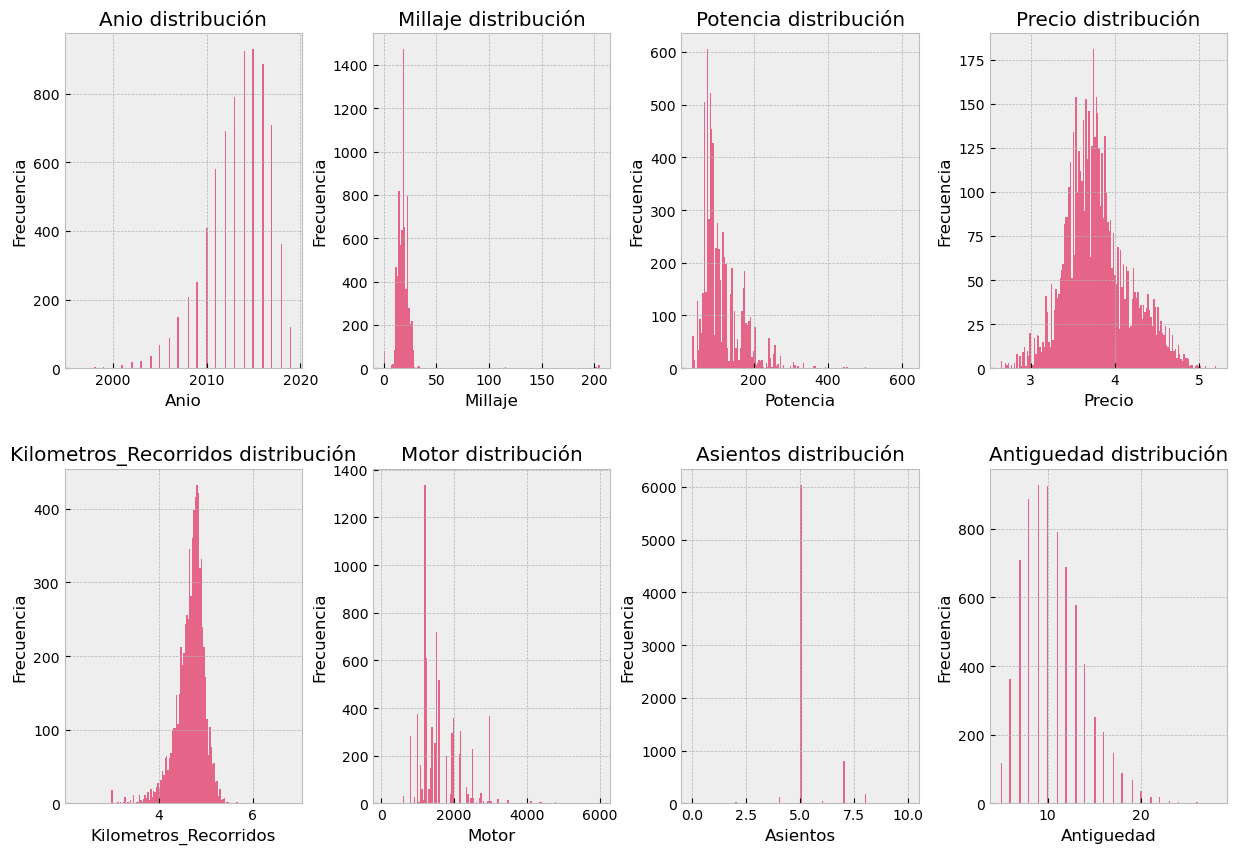

In [337]:
variables_numericas = ['Anio', 'Kilometros_Recorridos', 'Millaje','Motor','Potencia','Asientos','Precio','Antiguedad']
graficar_dimensiones_numericas(new_df,variables_numericas, '#E46588')

i. Compare entre sí cada una de las dimensiones numéricas (análisis bivariado) con un gráfico del tipo “pairplot”.

/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gsu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

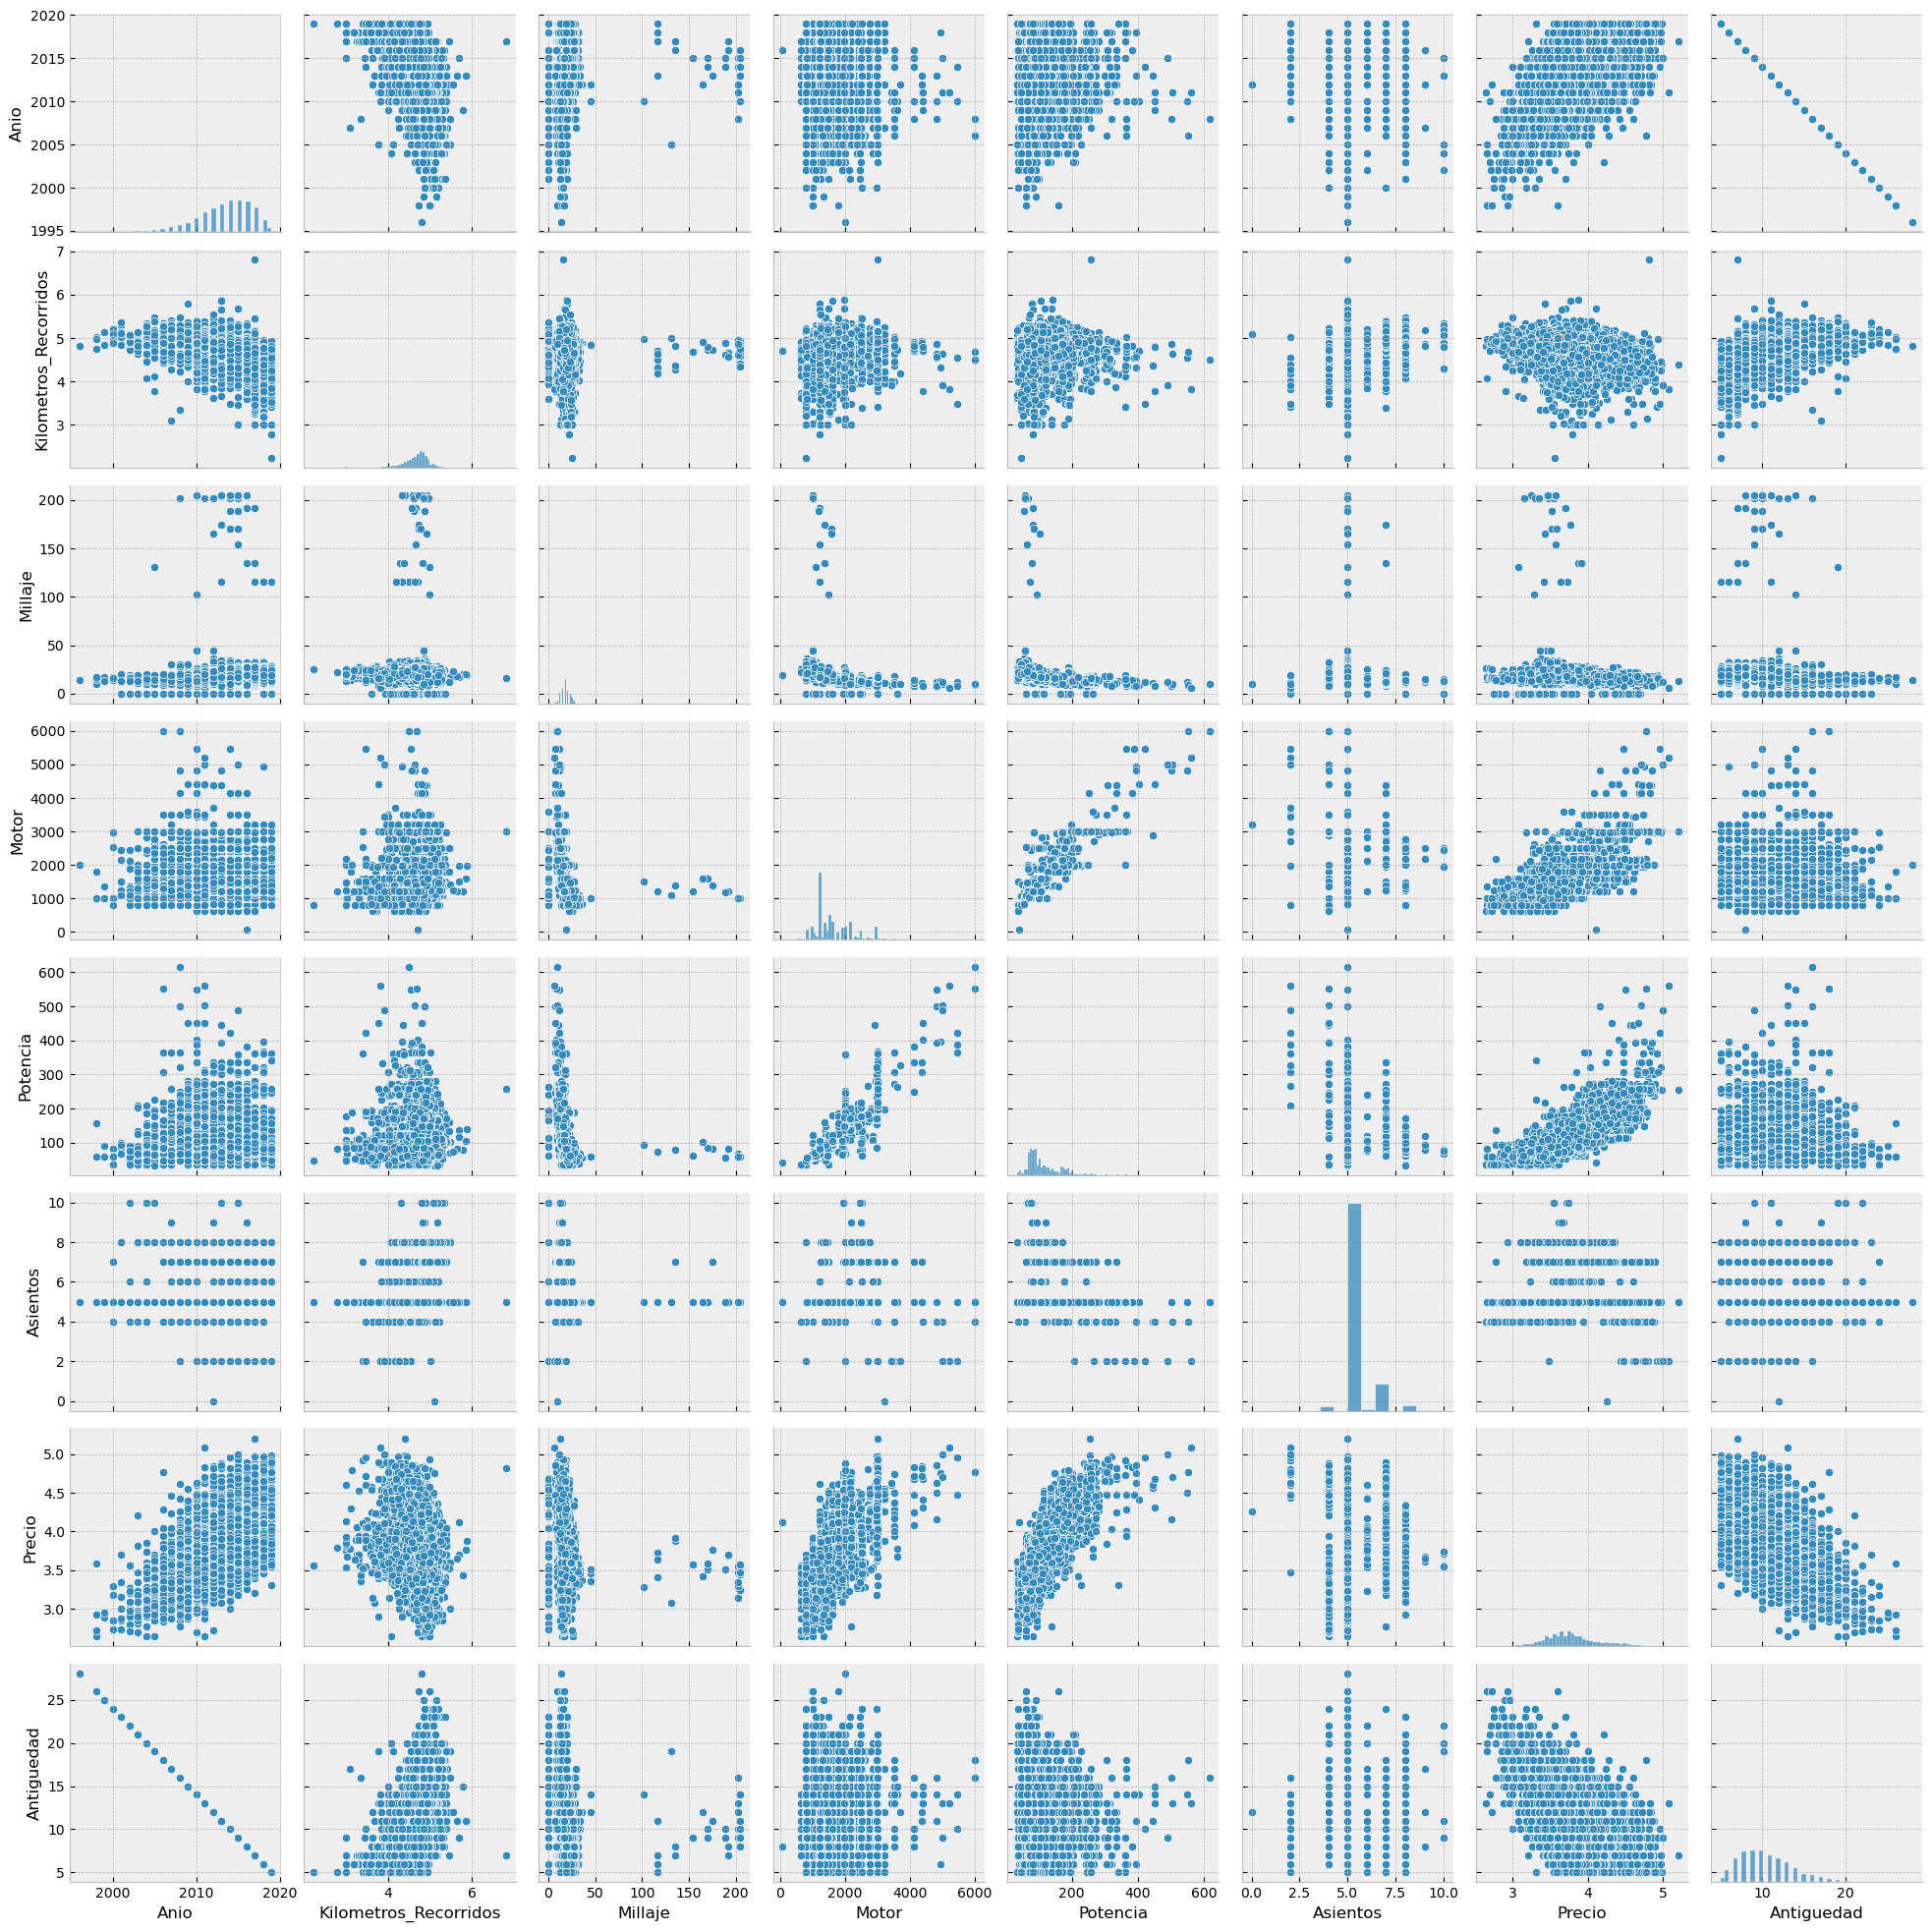

In [338]:
sns.pairplot(data=new_df[variables_numericas])
plt.show()

j. Realice un mapa de calor para identificar la correlación entre todas las variables (análisis multivariado).

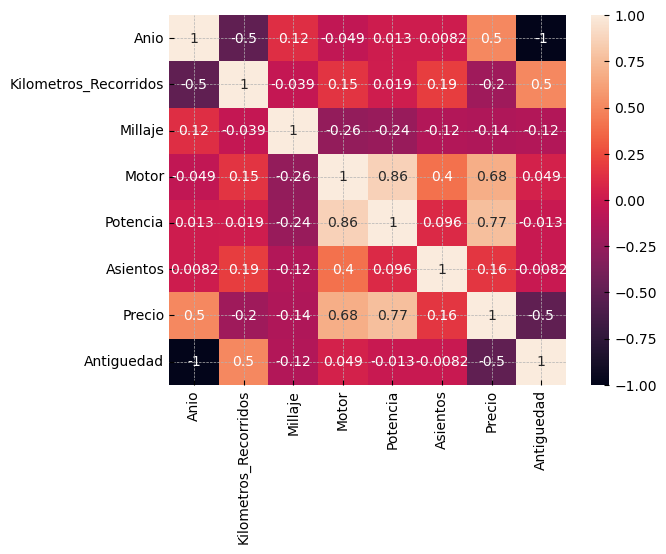

In [339]:
# Calcula la matriz de correlación entre las variables numéricas seleccionadas
matriz_cor = new_df[variables_numericas].corr()

# Dibuja un mapa de calor de la matriz de correlación, con anotaciones mostradas en cada celda
sns.heatmap(matriz_cor, annot=True)

# Muestra el gráfico
plt.show()

k. Grafique la distribución de cada una de las dimensiones categóricas

In [340]:
variables_categoricas = new_df.columns.drop(variables_numericas)
print(variables_categoricas)

Index(['Nombre', 'Ubicacion', 'Tipo_Combustible', 'Transmision',
       'Tipo_Propietario', 'Marca', 'Modelo'],
      dtype='object')
